# Explore hourly PVDAQ Solar Data⚡ 
Found the data at https://bit.ly/2Trg41p

In [1]:
import matplotlib.pyplot as plt
#%matplotlib inline
import base64
import json 
from pprint import pprint
import collections
import sys
import numpy as np
import folium
import random
from os.path import join
import os
from folium import IFrame

In [2]:
with open(os.path.join("data", 'PVDAQ_solar_energy_hourly_clean.json')) as f:
    text = f.read()
    PVDAQ = json.loads(text)

## Create Generation Figures

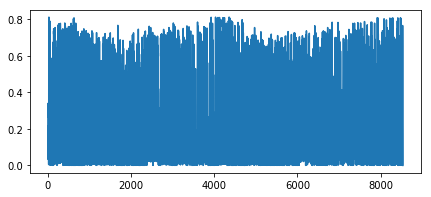

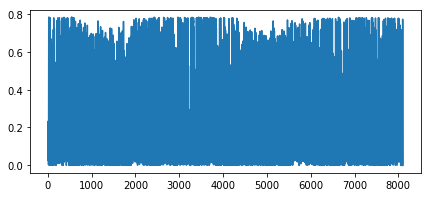

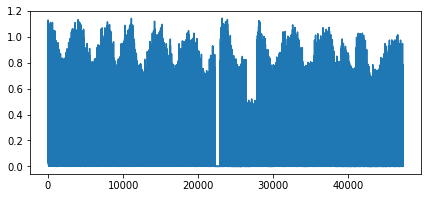

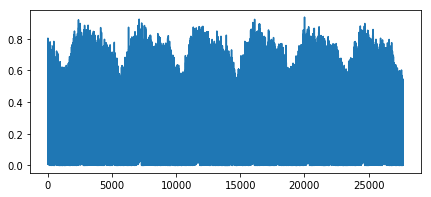

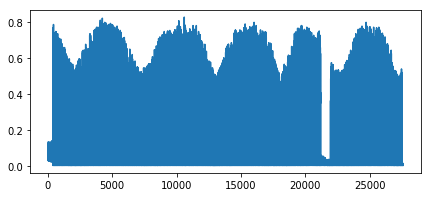

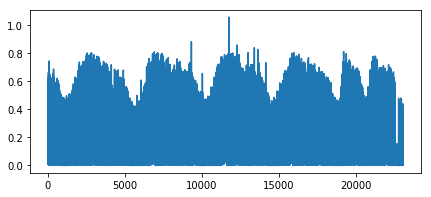

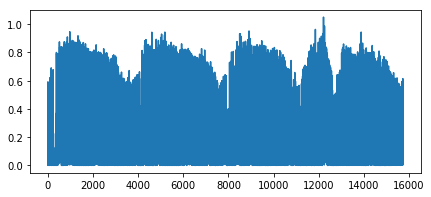

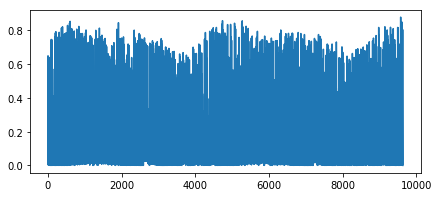

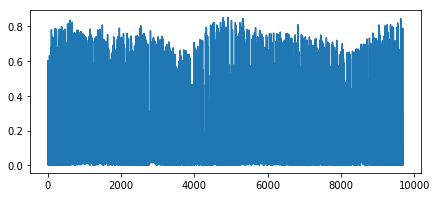

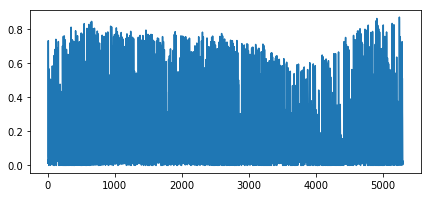

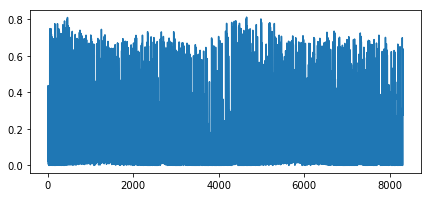

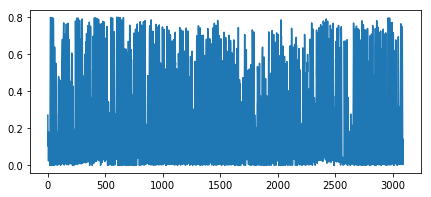

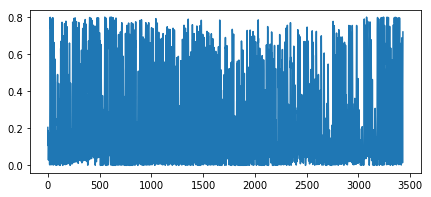

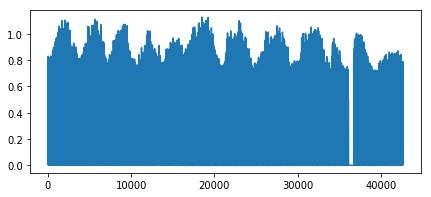

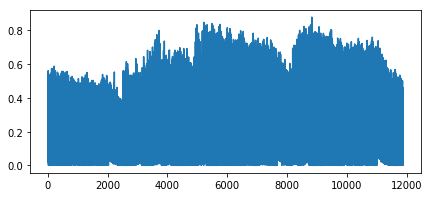

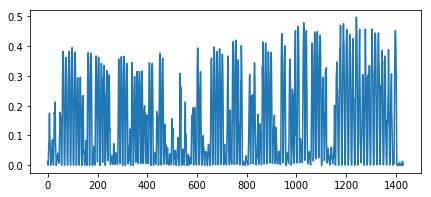

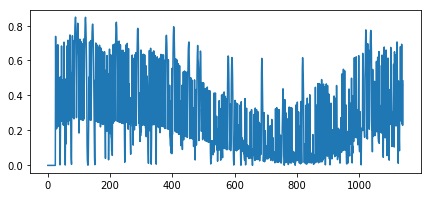

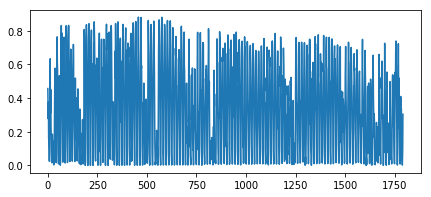

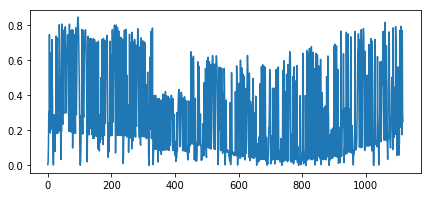

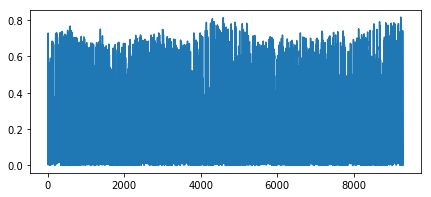

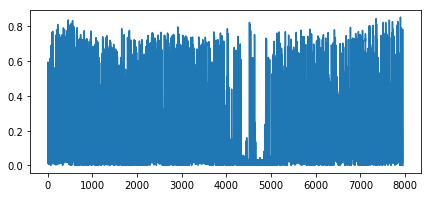

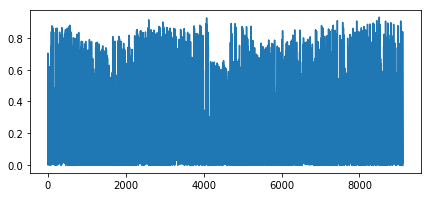

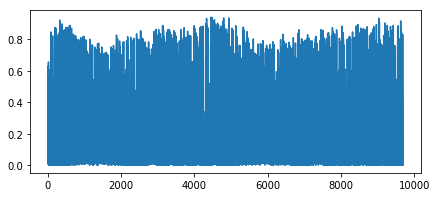

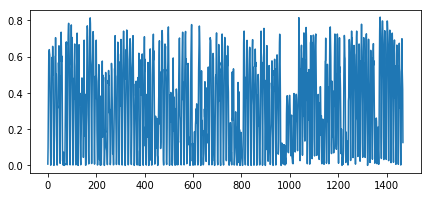

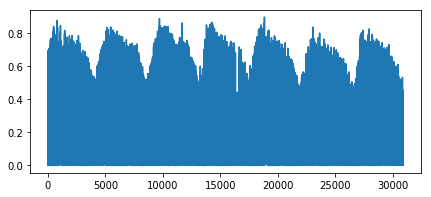

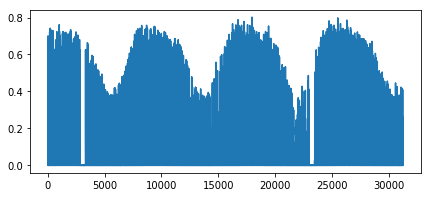

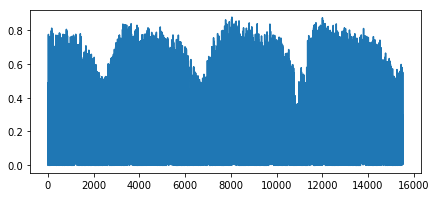

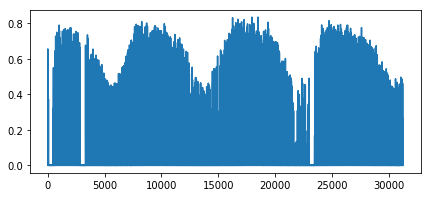

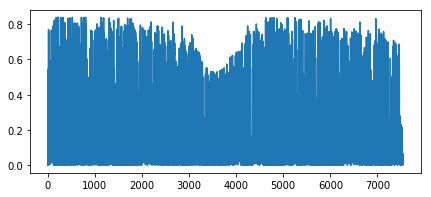

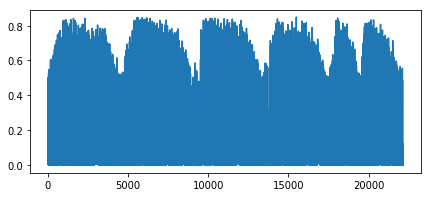

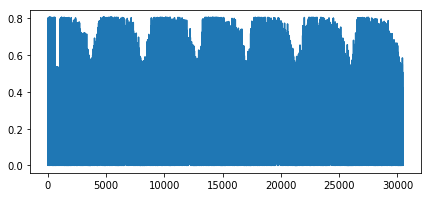

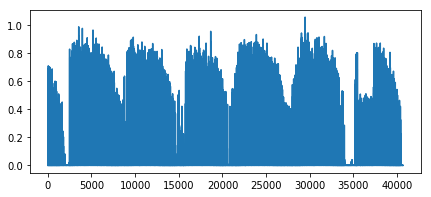

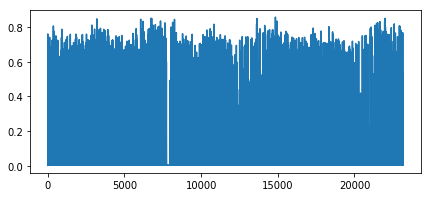

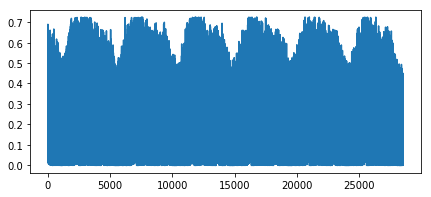

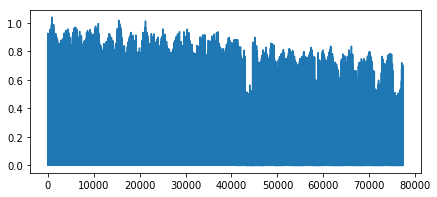

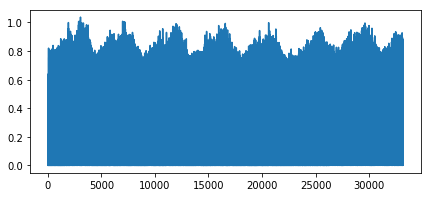

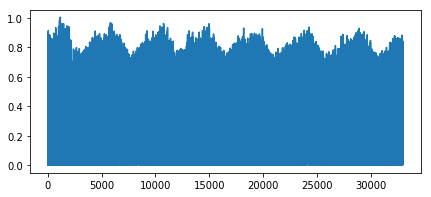

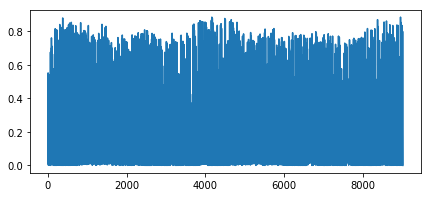

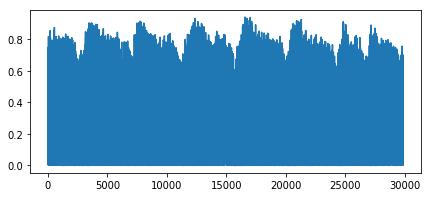

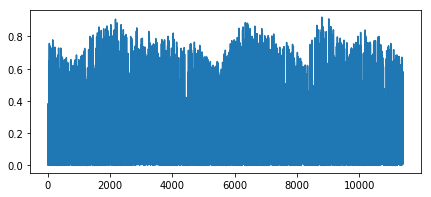

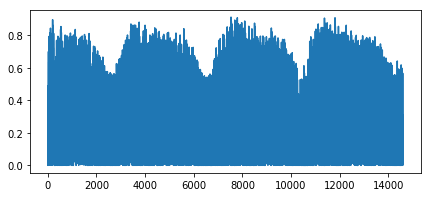

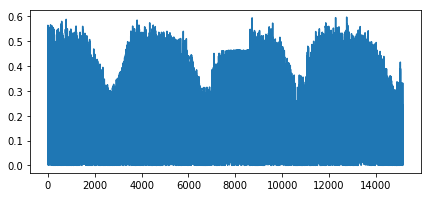

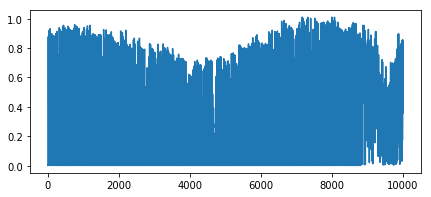

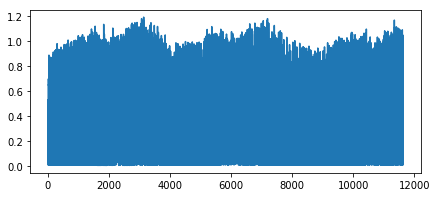

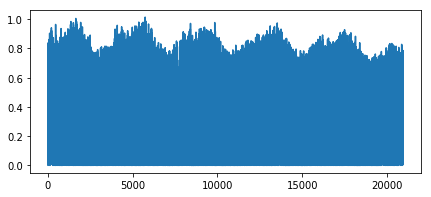

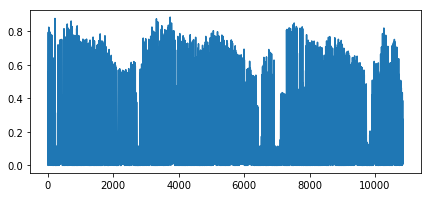

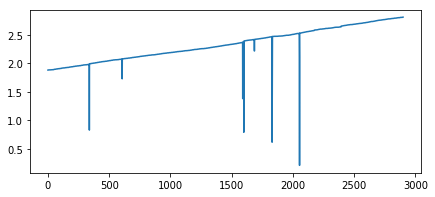

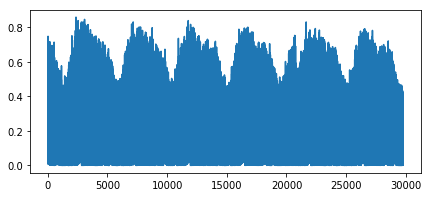

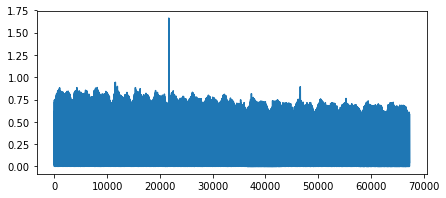

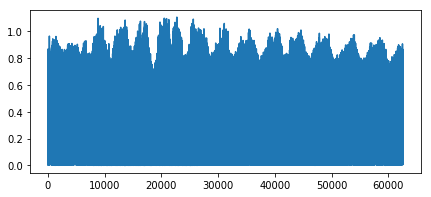

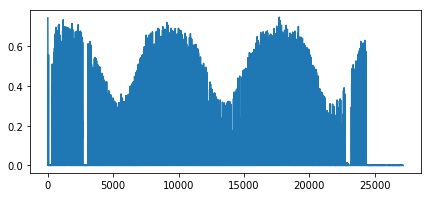

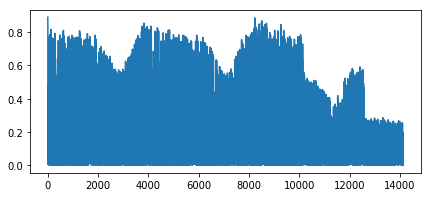

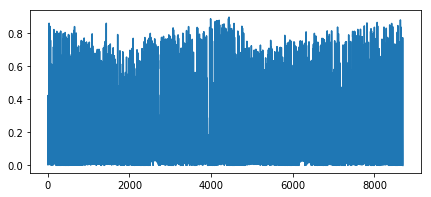

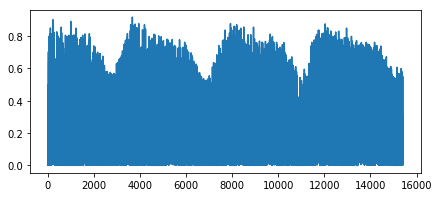

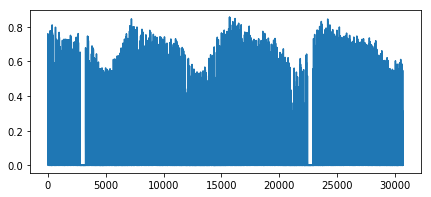

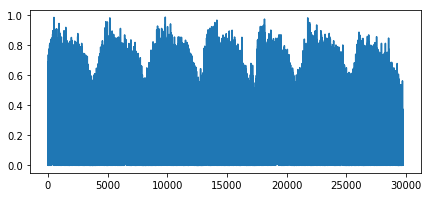

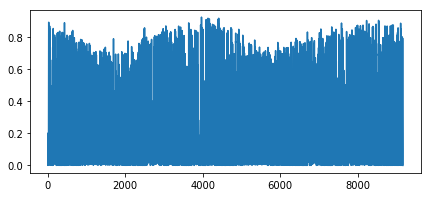

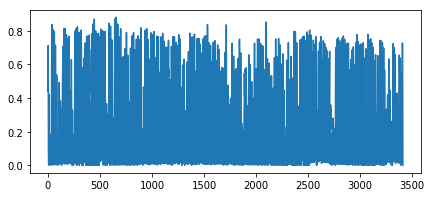

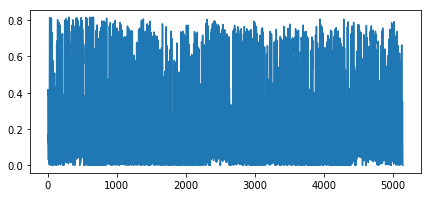

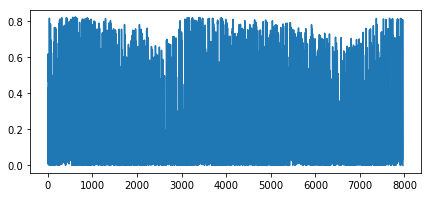

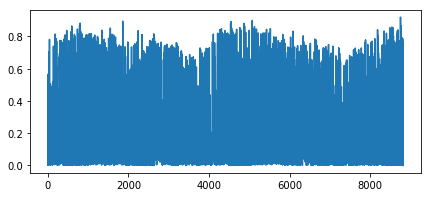

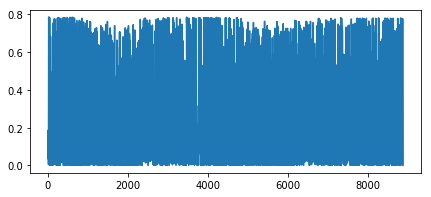

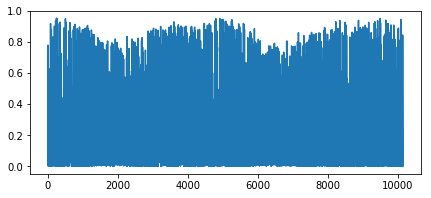

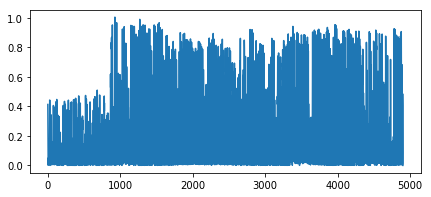

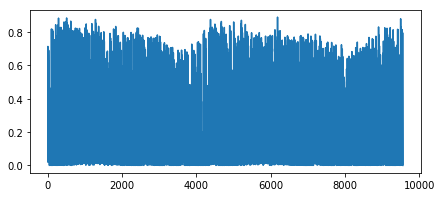

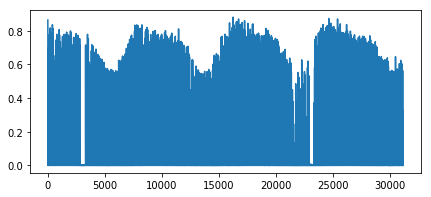

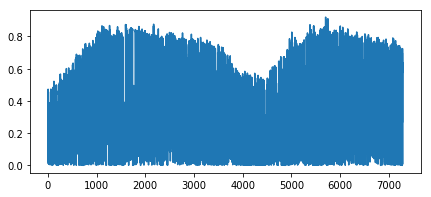

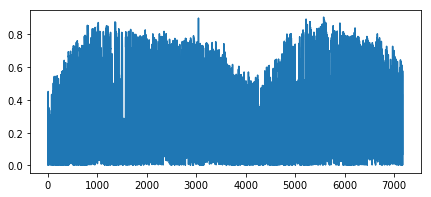

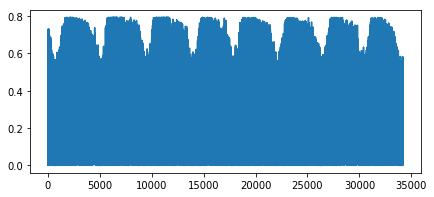

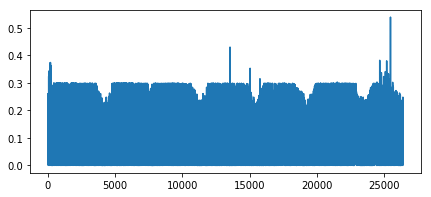

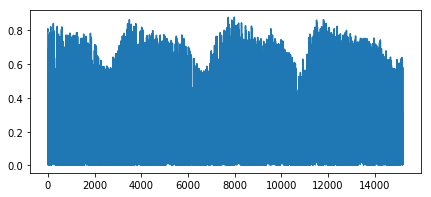

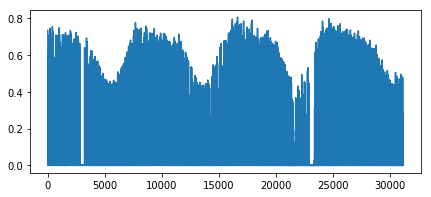

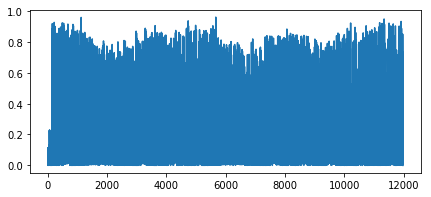

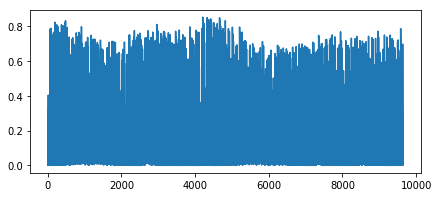

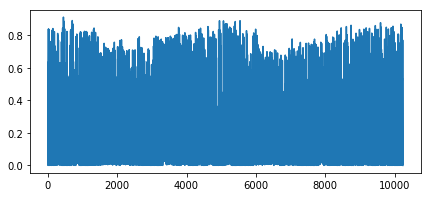

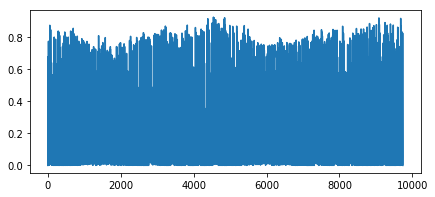

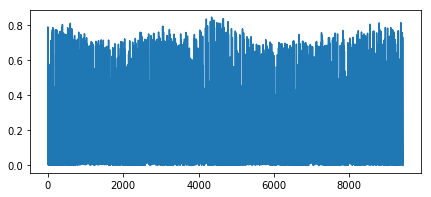

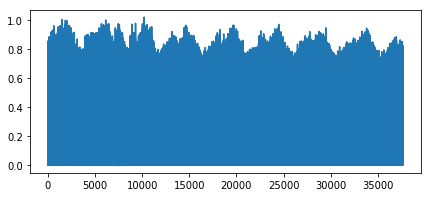

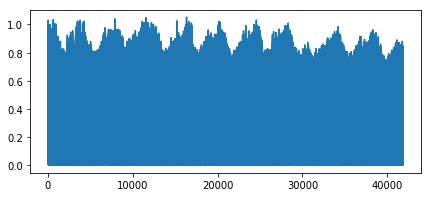

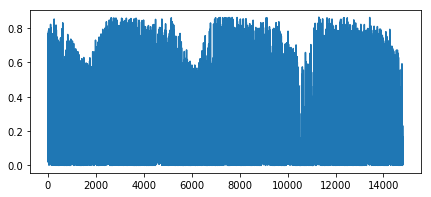

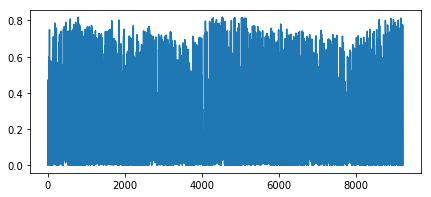

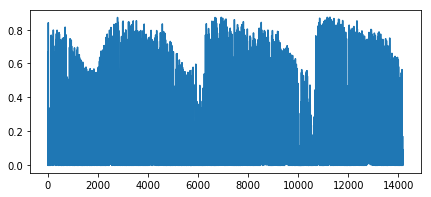

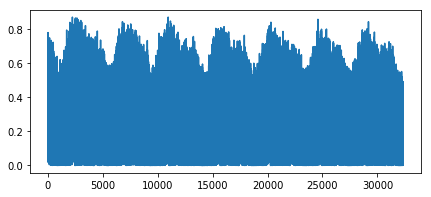

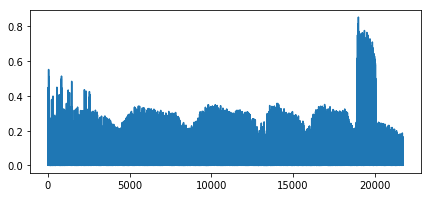

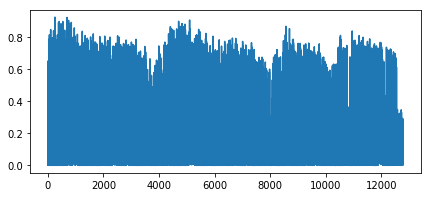

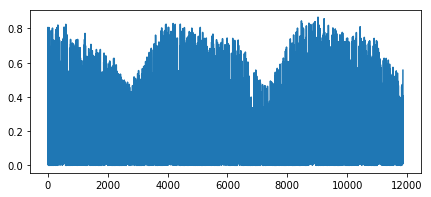

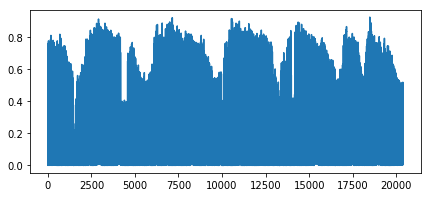

In [9]:
resolution, width, height = 75, 7, 3
directory = 'sequence_figures_hourly'


if not os.path.exists(directory):
    os.makedirs(directory)

for key in PVDAQ:
    if 'data' not in PVDAQ[key] or len(PVDAQ[key]['data']) == 0:
        continue
    fig, ax = plt.subplots(figsize=(width, height))
    sequence = [entry[1] for entry in PVDAQ[key]['data']]
    
    file_name = '{}.png'.format(key)
    path_name = join(directory, file_name) 
    
    _ = ax.plot(sequence)
    fig.savefig(path_name, dpi=resolution)
    
    

## Plot On Map

In [6]:
resolution, width, height = 75, 7, 3

def popup_from_figure(figure_path):
    """ Takes a path to a png and returns a popup that can be displayed in folium """
    
    encoded =  base64.b64encode(open(figure_path, 'rb').read()).decode()
    html = '<img src="data:image/png;base64,{}"> <img src="data:image/png;base64,{}">'.format
    iframe = IFrame(html(encoded, encoded), width=(width*resolution)+20, height=(height*resolution)+20)
    popup = folium.Popup(iframe, max_width=2650)
    
    return popup

In [10]:
world_map = folium.Map(location=[30, -90], zoom_start=3.5)

for key in PVDAQ:
    if 'data' not in PVDAQ[key] or len(PVDAQ[key]['data']) == 0:
        continue
    file_name = '{}.png'.format(key)
    figure_path = join(directory, file_name) 
    lat = float(PVDAQ[key]['site_latitude'])
    lon = -float(PVDAQ[key]['site_longitude'])
    
    popup = popup_from_figure(figure_path)
    
    folium.Marker(location=[lat, lon],
                  popup=popup).add_to(world_map)

world_map.save('index.html')